In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage

In [2]:
df = pd.read_csv("wine.csv")

In [3]:
df1 = df.iloc[:, 1:]

In [4]:
df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df1.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Finding correlation between the variables in the data

In [6]:
cor = df1.corr()

In [7]:
cor.style.background_gradient(cmap='coolwarm')

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


There are some quite correlation between variables. 
For example the correlation between flavanoids and dilution is pretty high (78%). 
Thus we can remove that variable from our dataset. However this method is long and tedious. 
Hence we PCA method for Dimensionality Reduction.

# Dimensionality Reduction with PCA

In [8]:
df_norm = StandardScaler().fit_transform(df1) # normalizing the data 

In [9]:
pca = PCA(n_components=13)

In [10]:
principalComponents = pca.fit_transform(df_norm)

([<matplotlib.axis.XTick at 0x21a69ce5340>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

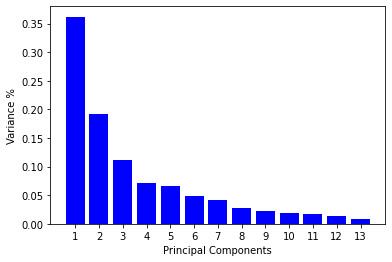

In [11]:
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

In [12]:
PCA_components = pd.DataFrame(principalComponents)

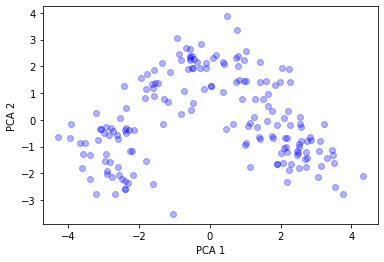

In [13]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='blue')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

As shown in the bar graph, the most of varianve is put in the first 2 components. Since there is not much variance present from 3rd component, lets just the first 2 componets in our analysis. 
The scatter plot given an indication that there may be 3 clusters present

Finding out the optimal number of clusters

In [14]:
wcss = []

In [15]:
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(PCA_components.iloc[:,:3])
    wcss.append(kmeans.inertia_)

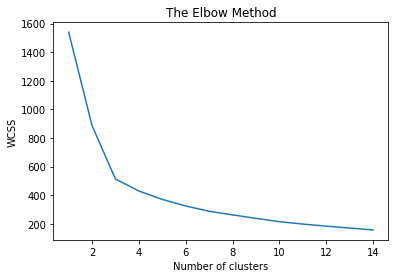

In [16]:
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The scree plot levels off at k=3 and let's use it to determine the clusters

# K clusters

In [17]:
model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:2])

KMeans(n_clusters=3)

In [18]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=3)

In [19]:
labels = model.predict(PCA_components.iloc[:,:2])

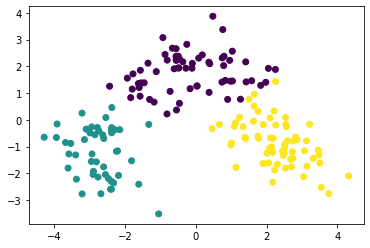

In [20]:
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

In [21]:
k_new_df=pd.DataFrame(principalComponents[:,0:2])

In [22]:
model_k = KMeans(n_clusters=3)
model_k.fit(k_new_df)

KMeans(n_clusters=3)

In [23]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=3)

In [24]:
model_k.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [25]:
md=pd.Series(model_k.labels_)

In [26]:
df1['clust']=md

In [27]:
k_new_df.head()

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [28]:
df1.groupby(df1.clust).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,
0,12.238308,1.931385,2.219385,19.898462,92.830769,2.204308,1.989231,0.365538,1.587692,2.992615,1.051631,2.769231,506.353846
1,13.659219,1.975781,2.463750,17.596875,107.312500,2.859688,3.012656,0.290000,1.921719,5.406250,1.069688,3.157188,1082.562500
2,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020


# H- Cluster

In [29]:
model2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [30]:
h_cluster = model2.fit(PCA_components.iloc[:,:2])

In [31]:
labels2 = model2.labels_

In [32]:
X = PCA_components.iloc[:,:1]
Y = PCA_components.iloc[:,1:2]

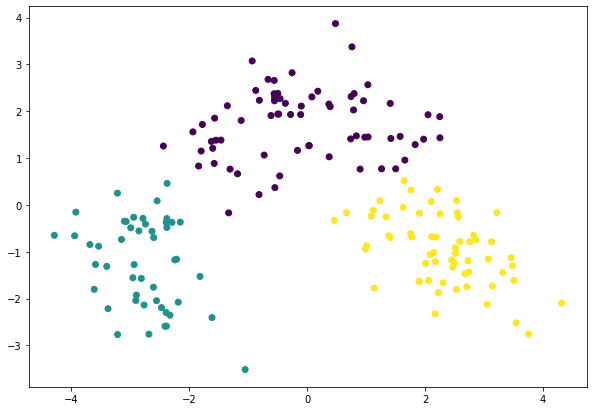

In [33]:
plt.figure(figsize=(10, 7))  
plt.scatter(X, Y, c=labels2) 

In [34]:
h_new_df=pd.DataFrame(principalComponents[:,0:2])

In [35]:
h_new_df.head()

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [36]:
hcf = linkage(h_new_df,method="complete",metric="euclidean")

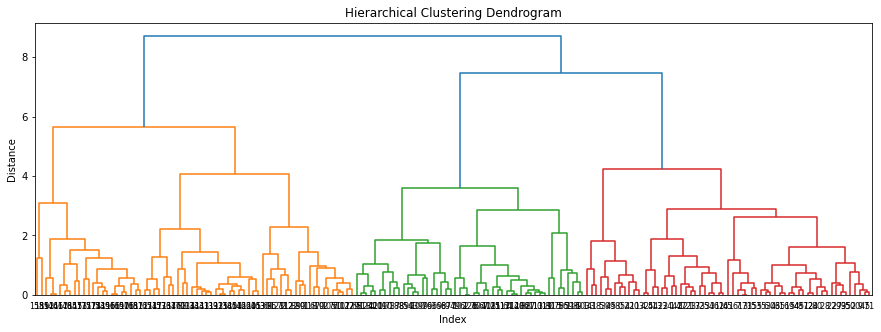

In [37]:
plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    hcf,
    leaf_rotation=0.,
    leaf_font_size=8.,
)
plt.show()

In [38]:
h_complete = AgglomerativeClustering(n_clusters=5,linkage='complete',affinity = "euclidean").fit(h_new_df) 

In [39]:
h_complete.labels_

array([4, 3, 3, 4, 3, 4, 3, 3, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 3, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [41]:
df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [42]:
df1.groupby(df1.clust).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,
0,12.238308,1.931385,2.219385,19.898462,92.830769,2.204308,1.989231,0.365538,1.587692,2.992615,1.051631,2.769231,506.353846
1,13.659219,1.975781,2.463750,17.596875,107.312500,2.859688,3.012656,0.290000,1.921719,5.406250,1.069688,3.157188,1082.562500
2,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020


# Conclusion

Using PCA we reduced the variables to only 2 from 13 and use clustering classification,
we can safely assume that there exists 3 cluster in the wine data sets